# E-commerce research. Identifying consumption profiles

**Objectives** 
* segmenting customers based on their purchase history
* development of individual recommendations to increase sales for each customer segment

**Summary**
Analyzed the overall performance of the store and identified problem areas. Categorization of the store's goods was made in order to further determine the patterns in the segments. Customers of the store are divided into 4 segments based on RFM analysis. Hypotheses were hypothesized and tested, confirming that each segment is unique and different from the other segments. Features in the interaction of each customer segment with the store were identified. Specific recommendations for improving the interaction with each segment were given

## Initial Data Analysis

In [18]:
# import required libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

try: 
    import pymorphy3
except:
    !pip3 install pymorphy3
    import pymorphy3

try:
    import openpyxl
except:
    !pip3 install openpyxl

# environment options
pd.options.display.float_format = '{:,.2f}'.format


### data reading

In [19]:
google_id = "1DkqEQWZoHh22YrsYcNUxSzlhgFqdl0tf"
df = pd.read_csv(f"https://drive.google.com/uc?export=download&id={google_id}" )

### columns names

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


Nothing to change

### types of data

the data type should be changed 
* the 'date' field is now of integer type and contains the date in the format YYYYmmddHHH
* the 'order_id' field is now of integer type

In [21]:
df.date = pd.to_datetime(df.date, format='%Y%m%d%H')

df.order_id = df.order_id.astype(str)

### na

no na in dataset

### duplicates

#### explicit duplicates

In [22]:
df[df.duplicated()]

,date,customer_id,order_id,product,quantity,price


no explicit duplicates in dataset

#### implicit duplicates

In [23]:
for column in df.columns:
    dfs = df.drop(columns={column})
    if len(dfs[dfs.duplicated(keep=False)]) > 0:
        print(f'duplicates when column {column.upper()} dropped')
        display(dfs[dfs.duplicated(keep=False)])


duplicates when column DATE dropped


,customer_id,order_id,product,quantity,price
15,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Мини-сковорода Marmiton ""Сердце"" с антипригарн...",1,239.00
16,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Сковорода алюминиевая с антипригарным покрытие...,1,824.00
17,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Стеклянная крышка для сковороды ALPENKOK 26 см...,1,262.00
18,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Сушилка для белья напольная Colombo Star 18, 3679",1,"1,049.00"
19,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,"3,299.00"
...,...,...,...,...,...
6716,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.00
6717,344aa778-e436-419e-a9c6-9b8f37b7c1df,73137,Сумка-тележка 2-х колесная Gimi Argo синяя,1,"1,087.00"
6728,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.00
6729,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.00


duplicates when column CUSTOMER_ID dropped


,date,order_id,product,quantity,price
4297,2019-06-02 10:00:00,71571,"Бегония Элатиор, цвет в ассортименте",1,187.00
4298,2019-06-02 10:00:00,71571,"Бегония Элатиор, цвет в ассортименте",1,187.00


duplicates when column ORDER_ID dropped


,date,customer_id,product,quantity,price
1055,2018-12-02 15:00:00,036118cf-c198-48fa-ba15-6d841482a56d,Салатник ВОЛАРЭ БЛЭК 16 см G9403 Luminarc,6,97.00
1056,2018-12-02 15:00:00,036118cf-c198-48fa-ba15-6d841482a56d,Тарелка суповая ВОЛАРЭ БЛЭК 23 см G9402 Luminarc,3,127.00
1057,2018-12-02 15:00:00,036118cf-c198-48fa-ba15-6d841482a56d,Салатник ВОЛАРЭ БЛЭК 16 см G9403 Luminarc,6,97.00
1058,2018-12-02 15:00:00,036118cf-c198-48fa-ba15-6d841482a56d,Тарелка суповая ВОЛАРЭ БЛЭК 23 см G9402 Luminarc,3,127.00
1105,2018-12-04 19:00:00,b2da4ddc-71b5-499b-9806-d59c7a7e6cf5,Чайник электрический ВАСИЛИСА Т33-2000 нержаве...,1,749.00
1106,2018-12-04 19:00:00,b2da4ddc-71b5-499b-9806-d59c7a7e6cf5,Чайник электрический ВАСИЛИСА Т33-2000 нержаве...,1,749.00
1486,2019-01-12 11:00:00,364754b9-56fd-49b5-b6fb-d1fca7ca82f9,Гладильная доска НИКА LORA FASHION HLF 123х46 см,1,"1,912.00"
1487,2019-01-12 11:00:00,364754b9-56fd-49b5-b6fb-d1fca7ca82f9,Гладильная доска НИКА LORA FASHION HLF 123х46 см,1,"1,912.00"
1526,2019-01-16 15:00:00,fb2f95f0-1f30-4e6a-a75c-92d1e2d341e3,"Сушилка для белья на батарею, СБ5-45, НИКА",1,134.00
1527,2019-01-16 15:00:00,fb2f95f0-1f30-4e6a-a75c-92d1e2d341e3,"Сушилка для белья на батарею, СБ5-45, НИКА",1,134.00


duplicates when column PRODUCT dropped


,date,customer_id,order_id,quantity,price
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,1,112.00
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,1,112.00
25,2018-10-02 11:00:00,1bc8ad38-3392-4042-8cde-aa5de306c947,68494,1,29.00
26,2018-10-02 11:00:00,1bc8ad38-3392-4042-8cde-aa5de306c947,68494,1,59.00
27,2018-10-02 11:00:00,1bc8ad38-3392-4042-8cde-aa5de306c947,68494,1,104.00
...,...,...,...,...,...
6619,2019-10-16 08:00:00,000d6849-084e-4d9f-ac03-37174eaf60c4,14943,1,135.00
6620,2019-10-16 08:00:00,000d6849-084e-4d9f-ac03-37174eaf60c4,14943,1,135.00
6621,2019-10-16 08:00:00,000d6849-084e-4d9f-ac03-37174eaf60c4,14943,1,135.00
6657,2019-10-20 19:00:00,e2e51402-7dcd-4973-873b-be978dfb3ef3,14945,1,150.00


When the following columns are excluded consecutively, the implicit duplicates appeared probably as a result of a database recording error (duplicate entries from different sources) have been detected:
- DATE - the duplicates will be removed. It is impossible for the same orders to have been created at different times
- CUSTOMER_ID - duplicates will be deleted. It is impossible that different customers will create the same orders
- ORDER_ID - duplicates will be deleted. It is impossible that one and the same client at the same time created two orders with the same product
- PRODUCT - duplicates will be kept, one customer could have bought several products with the same price and quantity within one order

In [24]:
before = len(df)
df = df.sort_values('date').drop_duplicates(subset=['customer_id', 'order_id', 'product'], keep='first')
print(f'{before - len(df)} duplicates deleted')
before = len(df)
df = df.sort_values('date').drop_duplicates(subset=['date', 'order_id', 'product'], keep='first')
print(f'{before - len(df)} duplicates deleted')
before = len(df)
df = df.sort_values('date').drop_duplicates(subset=['date', 'customer_id', 'product'], keep='first')
print(f'{before - len(df)} duplicates deleted')
before = len(df)

1886 duplicates deleted
1 duplicates deleted
19 duplicates deleted


In [25]:
duplicated_orders = df.groupby('order_id', as_index=False).agg({'customer_id':'nunique'}).query('customer_id > 1')
display(duplicated_orders)

len_before = df.order_id.nunique()
df = df[~df.order_id.isin(duplicated_orders.order_id)]
print(f'удалено {len_before - df.order_id.nunique()} заказов, принадлежащих одновременно разным пользователям')

,order_id,customer_id
985,14872,2
1253,68785,2
1532,69283,2
1552,69310,2
1567,69345,2
1597,69410,2
1637,69485,3
1668,69531,2
1800,69833,2
1932,70114,2


удалено 28 заказов, принадлежащих одновременно разным пользователям


## Exploratory Data Analysis

### dataset parameters

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5504 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5504 non-null   datetime64[ns]
 1   customer_id  5504 non-null   object        
 2   order_id     5504 non-null   object        
 3   product      5504 non-null   object        
 4   quantity     5504 non-null   int64         
 5   price        5504 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 301.0+ KB
max date in dataframe is 2020-01-31 15:00:00
min date in dataframe is 2018-10-01 00:00:00


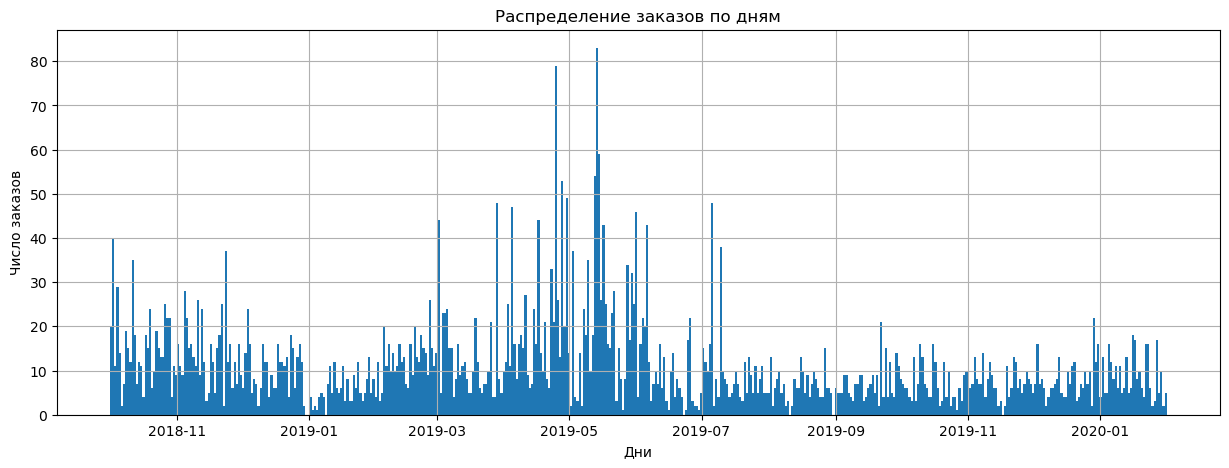

In [26]:
df.info()
print(f'max date in dataframe is {df.date.max()}')
print(f'min date in dataframe is {df.date.min()}')
dataset_days = (df.date.max() - df.date.min()).days

df.date.hist(figsize=(15,5), bins=dataset_days)
plt.title('Распределение заказов по дням')
plt.ylabel('Число заказов')
plt.xlabel('Дни')
plt.show();

* The data provided contains 7,474 entries and 6 columns:
    - purchase date
    - Customer ID
    - order ID
    - product name
    - quantity of items
    - unit price
* The dataset contains continuous data for the period from October 1, 2018 to January 31, 2020

### Dataset variables

What quantitative and qualitative variables are available for analysis in the original dataset

In [27]:
df.describe()

,quantity,price
count,"5,504.00","5,504.00"
mean,2.58,530.29
std,16.53,974.50
min,1.00,9.00
25%,1.00,90.00
50%,1.00,150.00
75%,1.00,524.00
max,"1,000.00","14,917.00"


- There are two quantity variables in the dataset
    * quantity - number of units of one product in one order
    * price - price per unit of a product in the order.
- All other variables are qualitative

### additional variables

#### month of order

In [28]:
df['month'] = df.date.dt.to_period('M')

#### orders' revenue

In [29]:
df['amount'] = df.price * df.quantity

#### monthly revenue per customer

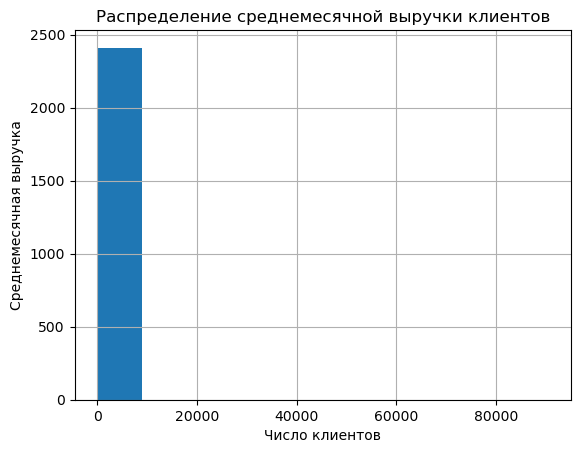

In [30]:
customers = df.groupby('customer_id', as_index=False).agg({'date':'min', 'amount':'sum', 'order_id':'nunique'})
customers = customers.rename(columns={'date':'first_order_date', 'amount':'total_revenue', 'order_id':'orders_count'})
customers['age_months'] = (df.date.max() - customers.first_order_date) / np.timedelta64(1, 'M')
customers['monthly_revenue'] = customers.total_revenue / customers.age_months
customers.monthly_revenue.hist()
plt.title('Распределение среднемесячной выручки клиентов')
plt.ylabel('Среднемесячная выручка')
plt.xlabel('Число клиентов')
plt.show();

The client's monthly revenue does not follow a normal distribution. This should be taken into account when choosing a method for hypothesis testing

#### number of orders per month

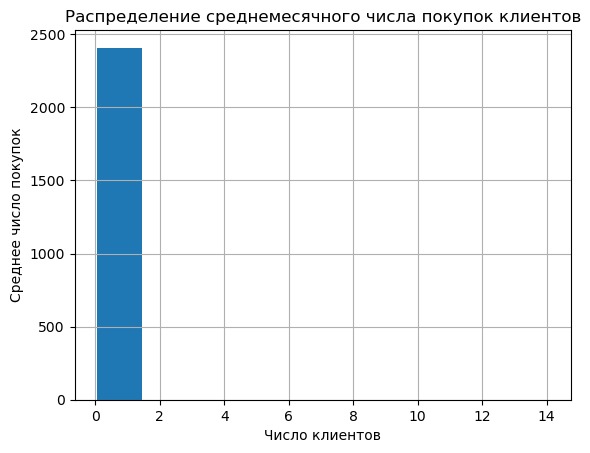

In [31]:
customers['monthly_orders'] = customers.orders_count / customers.age_months
customers.monthly_orders.hist()
plt.title('Распределение среднемесячного числа покупок клиентов')
plt.ylabel('Среднее число покупок')
plt.xlabel('Число клиентов')
plt.show();

The number of customer purchases per month does not follow a normal distribution. This should be taken into account when choosing a method for hypothesis testing

### abnormalities

#### abnormal products

In [32]:
display(
    df
    .groupby('product', as_index=False)
    .agg({'price':'max'})
    .sort_values('price', ascending=False)
    .head(10)
    )

,product,price
1808,Сушилка уличная Leifheit 85210 LINOMATIC V 400...,"14,917.00"
1637,Сумка-тележка хозяйственная Andersen Royal Sho...,"8,737.00"
1636,Сумка-тележка хозяйственная Andersen Alu Star ...,"8,437.00"
1684,Сумка-тележка хозяйственная Rolser MNB019 rojo...,"8,077.00"
1583,Стремянка 7 ступенчатая Hailo 8040-707 XXL 13 ...,"7,724.00"
1683,Сумка-тележка хозяйственная Rolser MNB017 fucs...,"7,679.00"
1668,Сумка-тележка хозяйственная Rolser IMX006 bass...,"7,679.00"
1685,Сумка-тележка хозяйственная Rolser MOU041 malv...,"7,597.00"
261,Гладильная доска Leifheit AirBoard Compact M P...,"7,424.00"
1944,Урна уличная стальная Сальвадор 02.021.0 46х11...,"7,349.00"


No abnormally expensive goods were found

#### abnormal orders

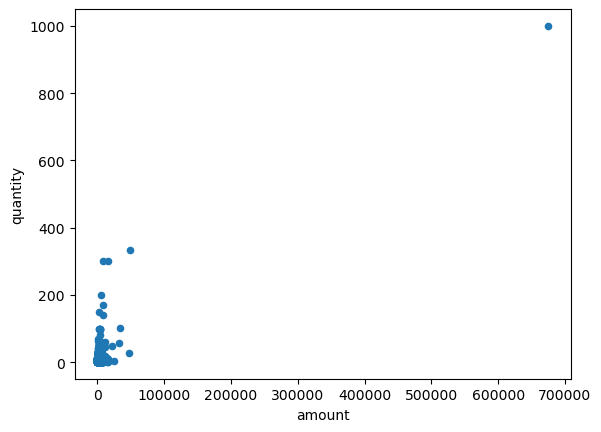

,date,customer_id,order_id,product,quantity,price,month,amount
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.00,2019-06,"675,000.00"


In [33]:
(
    df
    .groupby('order_id', as_index=False)
    .agg({'amount':'sum', 'quantity':'sum'})
    .plot.scatter(x='amount', y='quantity')
    )
plt.show();
anomaly_order = (
    df
    .groupby('order_id', as_index=False)
    .agg({'amount':'sum', 'quantity':'sum'})
    .sort_values('amount', ascending=False)
    .head(1)
)
display(df[df.order_id.isin(anomaly_order.order_id)])
df = df[~df.order_id.isin(anomaly_order.order_id)]

One abnormal order for 1000 vantuzes detected and removed

### product categories

In [34]:
# function to make lemmas based on product name
def lemma(product, morph=pymorphy3.MorphAnalyzer()):
    
    # split 'product' string into words
    words = product.split()
    
    # create lemmas from words with nouns and adjectives only
    lemma = []
    for word in words:
        p = morph.parse(word)[0]
        if 'NOUN' in p.tag or 'ADJF' in p.tag: 
            lemma.append(p.normal_form.replace(',', ''))

    # return first three lemmas
    return ' '.join(lemma[:2])

lemma_df = df.copy().groupby('product', as_index=False).agg({'quantity':'sum'})
lemma_df['lemma'] = lemma_df['product'].apply(lemma)

In [35]:
category_dictionary = {
    'Кухня': ['tepмокружка','банк','бидон','блюдо','блюдце','бульонница','ваза','венчик','вилка','вкладыш','готовый','губка','ёмкость','жестяной','запасный','измельчитель','картофелемялка','кастрюля','кипятильник','кисточка','коврик','ковш','контейнер','котёл','кружка','крышка','кувшин','кухонный','ложка','лопатка','лоток','мантоварка','мантоварка-пароварка','маслёнка','мерный','миксер','мини-сковорода','миска','модульный','мусорный','набор','нетканый','нож','ножеточка','овощеварка','овощечистка','орехоколка','отделитель','подставка','половник','полотенце','пресс','просеиватель','противень','пьезозажигалка','разделочный','рассекатель','рыбочистка','салатник','салфетница','сахарница','сито','скалка','скатерть','сковорода','скребок','соковарка','соковыжималка','сотейник','стакан','стеклянный','столовая','столовый','тарелка','тёрка','термокружка','термос','термостакан','толкушка','тортница','универсальный','фарфоровый','форма','хлебница','чайный','чайник','шприц','щётка-утюжок','электроштопор','мл','бутылочный','бутылка','радиаторный','рондо','стекло','крышка','металлический','стеклянный','пластмассовый','серия','утро','мистигря','маскарад','л','полимербыт','мусор','ягода','овальный','пластиковый','резинопластиковый','деревянный','столовая','хранение','скатерть','спираль','разделочный','свч','соус','банк','насадка','экран','овощ','алюминиевый','круглый','чугунный','электрический','силиконовый','м','интерьерный','кухонный','герметичный','приготовление','продукт','дисней','флауэр','шэйдс','бамбук','марля','нордик','минни','тачка','чай','мерный','прозрачный','трубочка','стерилизация','виктория','полотенце','ножницы','чайный','прорезь','холодец','нержавеющий','коровка','стакан','серо-голубой','василиса','антипригарный','фазенда','варение','контейнер','бокал','пикник','кружка','махровый','нож','посуда','дерево','столовый','форма','фужер','салатник','салфетка','мясорубка','стейк','тонкий','чистка','поварской','универсальный','лезвие','косточка','яйцо','пластик','чеснок','мука','прямоугольный','мультиискра','доска','пламя','amбиантэ','арти','кутюра','поэма','эмпилабль','браун','аспен','воларэ','карин','колорам','оранж','романтик','фарфоровый','wt125-куэн','полиэстер','донна','бежевый','ажурный','азалия','арлета','беатрис','джулия','династия','жаклин','лувр','муза','рим','сидней','виниловый','дем','эксперт','кондитерский','цитрусовый','низкий','ложка','десертный','обеденный','суповой','сыр','красный','синий','забава','яромир','вакуумный','кофе','картофель','выпечка','пластмасовый','заварочный','свисток','"алый','орхидея','набор','ручка','белый'],
    'Ванная и туалет': ['ёрш','бак','бельевая','ванна','вантуз','держатель','дозатор','зубной','карниз','коврик','кольцо','комплект','корзина','корзинка','корыто','махровый','мешок','мыло-скраб','мыльница','набор','подголовник','полотенце','прищепка','пробка','сидение','стакан','халат','штанга','штора','унитазный','бельё','прищепка','л','чёрный','туалетный','мыло','туалет','унитаз','паста','ванная','противоскользящий','коричневый','ванна','индия','ребристый','ворсовый','резиновый','хлопковый','штора','махровый','мягкий','колесо','пластиковый','крышка','полотенце','халат','деликатный','мочалка','пластмассовый','вафельный','кольцо','текстильный'],
    'Рассада': ['рассада','томат','целозия','цинерания','цинерария','циния','арбуз','дыня','кабачок','капуста','огурец','остеоспермум','патиссон','пеларгония','тыква','кассета','зелень','клубника','перец','пряный','томат','балконный','государь','детерминантный','гребенчатый','серебряный','"золотой','абрикос','абрикосовый','абруццо','амурский','арбузик','арбузный','аргентинский','бандед','баскью','болгарск','больший','большой','вернисаж','гигант','голубика','голубой','графити','грейпфрут','джалп','дрова','земляника','ильдь','индиго','исуповский','сорт','казацкий','канестрино','кибица','колоновидный','король','красный','кумато','легенда','летний','медовый','минусинский','монгольский','моравский','мохнатый','мэризола','оранжевый','перцевидный','полосатый','поцелуй','примарь','пурпурный','ракета','роджеро','розовый','синий','сладкий','леди','танец','тёмный','улыбка','фейерверк','черниченский','шаймета','шалун','сердцевидный','этуаля','южный','юсуповский'],
    'Хозяйственные товары': ['антижир','ароматизированный','бальзам','бензин','вакуумный','веник','весы','вешалка-сушилка','жидкий','защитный','кондиционер','концентрат','мешок','мыло','набор','насадка','насадка-моп','насадка-отжим','окномойка','ополаскиватель','отбеливатель','отжим','паста','пена','перчатка','полотенце','салфетка','сервировочный','скребок','сменный','смётка','совка','средство','стиральный','стремянка','стремянка-табурет','сумка','сумка-тележка','таз','тележка','ткань','тряпка','тряпкодержатель','маска','универсальный','урна-пепельница','крем','швабра','щётка','щётка-смётка','мл','средство','мытьё','пакет','подметание','сорго','напольный','настольный','электронный','мыло','соль','бельё','строительный','жидкий','ручной','коробка','ведро','швабра','синтетический','хлопковый','пластиковый','алюминиевый','пластмассовый','посудомоечный','пероксоль','полировка','зубной','ванна','специальный','чистка','латекс','латексный','резиновый','хлопок','натура','серый','шоколад','аметист','камушек','махровый','стол','салфетка','клипса','окно','насадка','блок','совок','зола','щётка','металический','быстрый','удаление','биопорошок','ступенчатый','ступень','класс','стальной','бытовой','металлический','тележка','хозяйственный','2-й','3-й','синий','красный','дем','багажный','гигиенический','универсальный','кафель','пятно','сальса','пол','многофункциональный','посуда','смахивание','труднодоступный','палубный','4-й','унитаз'],
    'Хранение': ['вешалка','вешалка-перекладина','вешалка-плечики','вешалка-стойка','декоративный','ключница','комод','короб','коробка','кофр','крючок','набор','плечики','полка','складный','стеллаж','чехол','этажерка','ящик','слуга','брюки','ник','гардеробный','деревянный','блузка','верхний','костюм','металлический','надверной','напольный','настенный','плечики','крючок','шт','эссенция','сакура','дерево','мягкий','коробка','картина','эльфпласт','стеллажный','перфорированный','хранение','прямоугольный','малый','одёжный','проволочный','вешалка','пластмассовый','обувь','барселона','берлин','италия','лондон','мадрид','нью-йорк','пекин','белый/чёрный','токио','торонто','картонный','короткий','одежда','платье','цветочный','почтовый'],
    'Сушка и глажка': ['гипоаллергенный','гладильный','доска','настенный','сидение','сушилка','концентрированный','доска-стремянка','гладильный','сушилка','мультя','бельё','уличный'],
    'Текстиль': ['двуспальный','комплект','наволочка','наматрасник','наматрацник','наматрицник-чехол','одеяло','плед','пододеяльник','подушка','покрывало','простыня','постельный','1-арктик','стёганый','бархатный','стебель','микрофибра','пуховый','белый','флисовыя','хлопок','цвет','декоративный','вельсофт','жаккарда','вафельный','двуспальный','резинка','сатиновый'],
    'Растения': ['агератум','адиантум','азалия','аквилегия','алиссума','алоэ','альбук','амариллис','анемон','антинакипин','антуриум','аптения','арбуз','аргирантерум','артемизия','аспарагус','астр','афеляндр','бадан','базилик','баклажан','бакоп','бальзамин','барвинок','бархатцы','бегония','буддлей','бузульник','валериан','вербейник','вербена','верёвка','вероника','вигна','виола','газаний','гайлардия','гардения','гвоздик','георгин','герань','гербер','гиацинт','гимнокалициум','гиностемма','гипсофил','глоксиния','годеция','горох','гортензия','девичий','декабрист','декоративный','дендробиум','джункус','диффенбахий','драцена','душица','дыня','ель','замиокулькас','зверобой','земляника','змееголовник','импатиенс','искусственный','иссоп','кабачок','каланхий','калатея','календула','калибрахоа','калла','каллуна','калоцефалус','камнеломка','кампанула','капсикума','капуста','кипарисовик','клён','клубника','кодонант','колеус','колокольчик','комнатный','кореопсис','кориандр','клюквенный','кэнди','лимонад','очаровашка','попсокс','снежный','котовник','кофе','крассула','крокус','лаванда','лаватер','лавр','лантан','лапчатка','левкой','лен','высокорослый','литопс','лобелия','лук','львиный','любисток','маттиола','мединилла','мелисса','мимоза','мирт','многолетний','молодило','монард','морковь','муляж','муррайя','мускари','черенок','колосистый','перечный','настурция','незабудка','нефролепис','нивянник','нолин','овсянница','огурец','однолетний','осина','папоротник','патиссон','пахир','пеларгония','пеперомия','петрушка','петуния','пиретрум','платикодон','подарочный','подвесной','подсолнечник','портулак','примула','пряный','пуансетие','пуансеттие','радермахер','ранункулус','роза','розмарин','рудбекия','салат','сальвия','сантолина','седума','сельдерей','синнингий','скиммия','смолёвка','соланум','солидаго','спатифиллум','суккулента','сциндапсус','табак','тагетис','тимьян','тыква','тюльпан','укроп','фаленопсис','фатсия','фиалка','физостегия','фикус','фиттония','флокс','фуксия','хамедорей','хлорофитум','хост','хризантема','хризолидокарпус','цветок','цветущий','цикламен','цвет','цинния','циперус','цитрофортунелла','чабёр','шалфей','шеффлера','эвкалипт','энотера','эпипремнум','эхеверие','эхинацея','эхинокактус','эшшольция','юкка','ясколка','лиза','индик','махровый','обыкновенный','снежный','скальный','вера','спиралиса','тёмно-красный','белый','утюг','андрианум','тропик','волгоградец','огонёк','сибирский','холодок','шуга','(полынь','спренжери','альпийский','скуарроса','сердцелистный','застольный','овощной','пурпурный','смесь','зелёный','самурай','ампельный','валера','новогвинейский','синий','весёлый','цвет','вечноцветущий','клубневой','вейер','пржевальский','лекарственный','монетчатый','ярко-розовый','красный','сиренево-белый','крупноцветковый','микс','полипропиленовый','колосковый','лилиана','рогатый','черенок','травянка','садовый','стандартный','турецкий','чёрный','домашний','комнатный','голубой','аврора','рембранд','амброзия','метельчатый','виноград','горшок','композиция','санки','фиолетовый','яблоневый','пенсила','топперо','камилла','фрагранс','алтайский','дин','золотой','колхозница','медовый','млада','награда','симпатия','канадский','оптимист','барон','молдавский','гвинея','лиана','лист','цветок','изумруд','каландив','крокат','бронзовый','пинк','суприма','сиреневый','желто-красный','малиновый','розово-сиреневый','оранжево/красный','жёлтый','гарден','брауни','арендс','тенистый','сальса','белокочанный','брокколи','брюссельский','декоративный','кольраби','цветной','лавсон','ложноплатановый','альба','мара','хонь','карпатский','персиколистный','растение','толл','стимул','кассета','клик','страйп','шт','г','розовый','мун','арабика','овата','торх','монт','нобилиса','огненный','травянистый','небесный','регатта','порей','зев','удалец','ночной','магнифика','стыдливый','гибридный','детский','"райский','ананас','апельсин','баклажан','банан','булка','вишня','гранат','груша','долька','жёлудь','клубника','лайм','лимон','манго','мандарин','морковь','оранжевый','перец','персик','томат','тыква','хлеб','черешня','чеснок','яблоко','полиуретан','мандариновый','шоколадный','драгоценность','лунный','орхидный','бостон','сизый','алтай','аристократ','багратион','боярский','закусочный','засолочный','высота','диск','зонтик','нло','акватик','грандифлора','душистый','зональный','плющелистный','розебудный','розоцветный','тюльпановидный','итальянский','корневой','листовой','бургунди','красно-розовый','фиолетово-белый','небесно-голубой','светло-сиреневый','малиново-белый','винно-белый','каскад','свитуния','изя','простой','робинсон','набор','кашпо','низкорослый','акаулис','трава','клуня','палас','патио','кустовой','минь','одноголовый','чайно-гибридный','тайгера','рукол','видный','почвопокровный','японский','звёздный','свита','шопен','ассортимент','бордовый','курительный','крымский','крупноплодный','бахромчатый','обильнолистный','люкс','королевский','карнавал','химера','вергинский','каучуконосный','скелетон','друммонд','прямостоячий','корейский','космо','лутесценс','искусственный','ацтек','коралловый','хаага','зумул','кумквата','голд','лузеана','гунни','сильвердроп','миссурийский','ауреум','лила','перл','грузонь','карминный','нитчатый','войлочный'],
    'Прочие': ['автоматический','завёртка','измерительный','карниз','ковёр','комплект','крепёж','лестница','лестница-стремянка','длина','ложка','многофункциональный','набор','насадка','настольный','новогодний','цвет','основание','приварной','рояльный','петля-стрела','подкладка','подрукавник','подставка','покрытие','пружина','пылесос','решётка','ролик','рукав','ручка','ручка-скоба','сверло','нитрид','светильник','сетка','складный','стяжка','термометр','уголок','урна','урна-пепельница','утюг','фал','фен','фиксатор-шар','фоторамка','холодный','чехол','шило','шнур','шпагат','шпингалет','штангенциркуль','щётка','форточный','длина','алюминиевый','придверный','пёс','полукруглый','мытьё','пружина','стремянка','алюминевый','3-й','4-й','7-й','8-й','6-ти','примус','обувной','инструмент','прецизионный','валик','гладильный','дерево','венга','пробка','гаражный','оксид','цинк','чехол','складный','обувь','цвет','дверной','красный','синий','вентиляционный','чистка','мебельный','белый','металл','титан','настольный','глажение','стирка','детский','оконный','окно','уличный','нержавеющий','чёрный','электрический','капроновый','дорожный','хром','фотография','сварка','хлопок','металлизированый','металлизированный','пластмассовый','резиновый','хозяйственный','полипропиленовый','точность'],
    }

In [36]:
# add category
def category(lemma):
    for key in category_dictionary.keys():
        if set(lemma.split()).issubset(set(category_dictionary[key])):
            return key
    return 'Прочие'

lemma_df['category'] = lemma_df.lemma.apply(category)

# merge lemma_df table with df
if 'category' in df.columns:
    df = df.drop('category', axis=1)
    
df = df.merge(lemma_df[['product', 'category']], on='product', how='left')

In [37]:
display(df.groupby('category', as_index=False).amount.sum())
print(f'доля категории Прочие по выручке {100 * df[df.category == "Прочие"].amount.sum() / df.amount.sum():.2f}%')

,category,amount
0,Ванная и туалет,"277,418.00"
1,Кухня,"436,409.00"
2,Прочие,"340,424.00"
3,Рассада,"82,180.50"
4,Растения,"568,481.67"
5,Сушка и глажка,"654,962.50"
6,Текстиль,"133,487.00"
7,Хозяйственные товары,"1,126,799.75"
8,Хранение,"275,500.00"


доля категории Прочие по выручке 8.74%


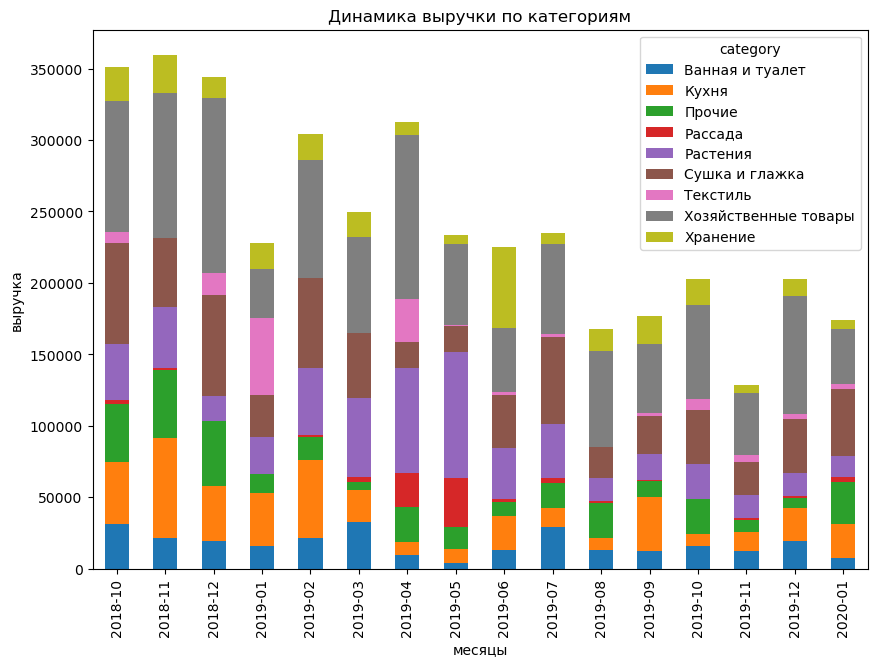

In [38]:
df_chart = (
    df.copy()
    .groupby(['category', 'month'], as_index=False)
    .agg({'amount':'sum'})
    .pivot_table(index='month', columns=['category'], aggfunc='sum', values='amount')
)

df_chart.plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('Динамика выручки по категориям')
plt.xticks(rotation='vertical')
plt.xlabel('месяцы')
plt.ylabel('выручка')
plt.show();

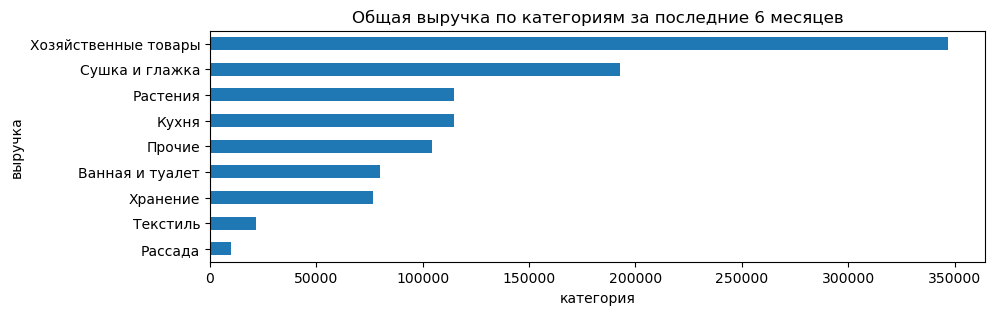

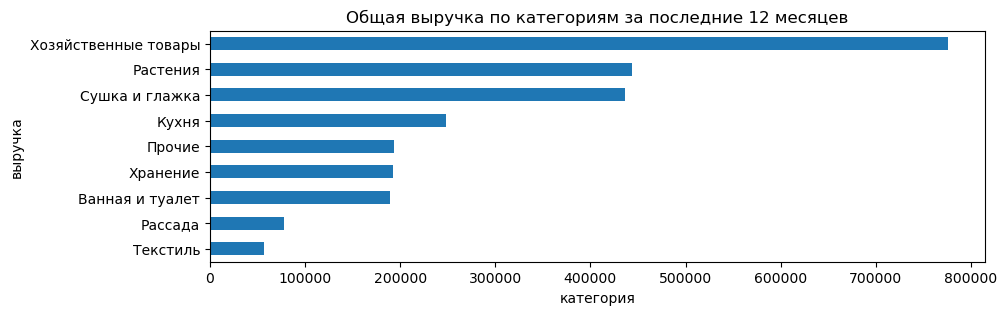

In [39]:
periods = [6, 12]
for period in periods:
    df_chart = (
        df[df.date > (df.date.max() - pd.DateOffset(months=period))].copy()
        .groupby('category')
        .agg({'amount':'sum'})
        .sort_values('amount')
    )
    
    df_chart.plot(kind='barh', figsize=(10,3), legend=None)
    plt.title(f'Общая выручка по категориям за последние {period} месяцев')
    plt.xlabel('категория')
    plt.ylabel('выручка')
    plt.show;

**Findings**
1. the best-selling category in the store is housewares
2. in the last 6 months the sales of plants have decreased noticeably
3. Plant sprouts are practically not sold. It is possible to reduce costs, by reducing the inventory in the category of plants
4. plants sold well in the first half of 2019. In 2020, it is worth trying to repeat this success and carefully check the assortment and pricing, so as not to miss the season
5. textile sales are very unstable. In some months of 2019 it did not sell at all, although in January and April textile sales were quite high. It is advisable to understand the reasons. It may be a matter of pricing or marketing activity 
6. Fluctuations in revenue by category are caused by a common external factor. It is recommended to check if there is a correlation between advertising activity and fluctuations in revenues

### Key store indicators

#### revenue dynamics

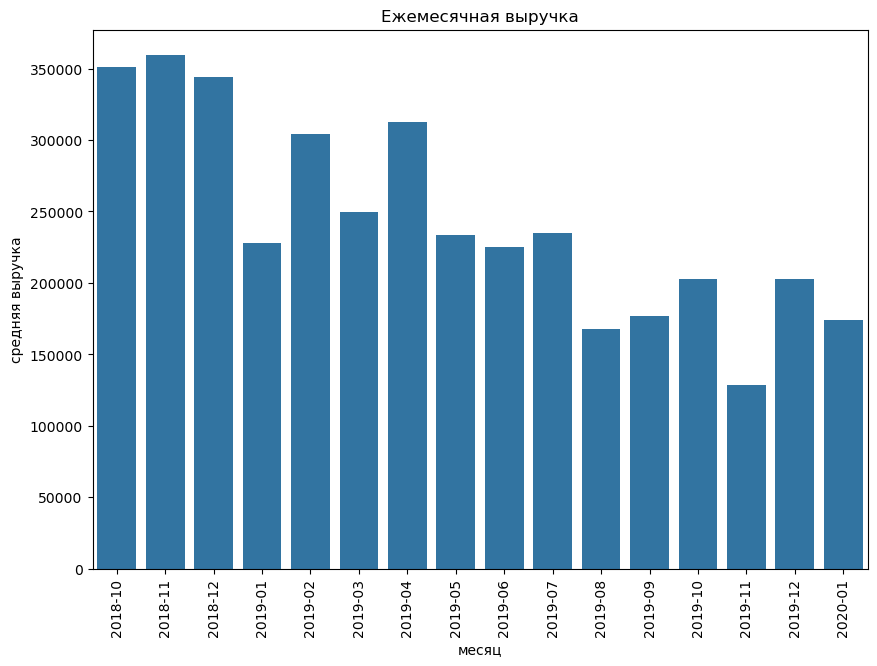

общая выручка магазина за весь период 3895662 руб.


In [40]:
df_chart = (
    df.copy().
    groupby('month', as_index=False)
    .agg({'amount':'sum'})
)

ax, fig = plt.subplots(figsize=(10,7))
sns.barplot(data=df_chart, x='month', y='amount', color='#1f77b4')
plt.title('Ежемесячная выручка')
plt.xticks(rotation='vertical')
plt.xlabel('месяц')
plt.ylabel('средняя выручка')
plt.show();
print(f'общая выручка магазина за весь период {df.amount.sum():.0f} руб.')


**Conclusion**

1. the store's revenue is declining
2. revenue is unstable and fluctuates greatly. if you have not already done so, it is worth paying attention to the development of your existing customer base in order to increase customer retention and thereby stabilize revenues 
3. there are seasonal declines of sales in May and January which are typical for any online store and seasonal growth in December (buying gifts)

#### number of orders dynamics

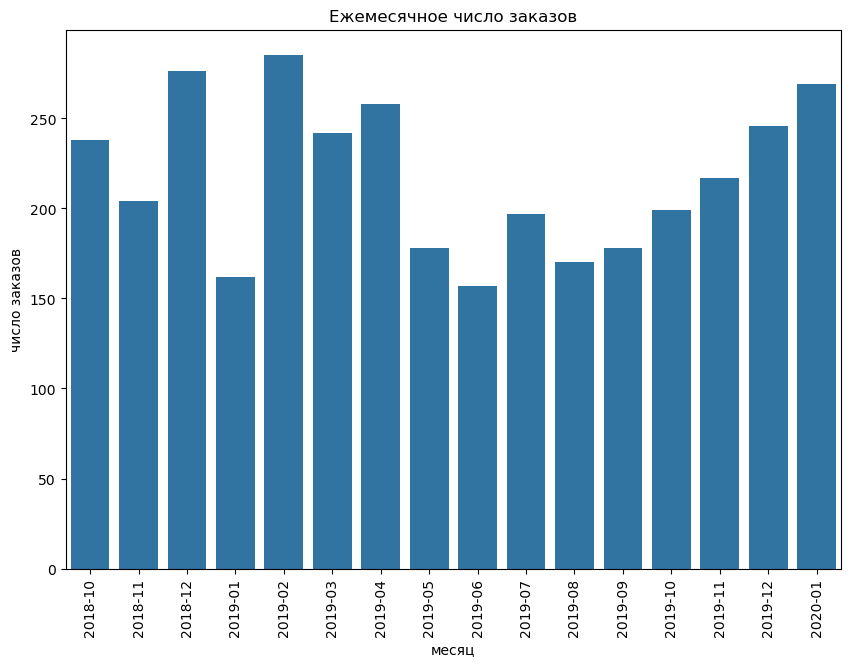

In [41]:
df_chart = (
    df.copy()
    .groupby('month', as_index=False)
    .agg({'order_id':'nunique'})
)

ax, fig = plt.subplots(figsize=(10,7))
sns.barplot(data=df_chart, x='month', y='order_id', color='#1f77b4')
plt.title('Ежемесячное число заказов')
plt.xticks(rotation='vertical')
plt.xlabel('месяц')
plt.ylabel('число заказов')
plt.show();

**Conclusion**.

1. The monthly number of orders ranges from 100 to 280
2. During the season (December and February-April) the number of orders rises to 280
3. the number of orders is steadily increasing from September 2019. But despite this, revenue fluctuates and does not show the same steady growth. So new orders are for smaller amounts than before. Worth working on expanding orders
4. January 2019 saw a dip in the number of orders. Perhaps there was a technical problem in the store and orders were not accepted. Or the store didn't work on New Year's holidays. 

#### repurchase rate dynamics

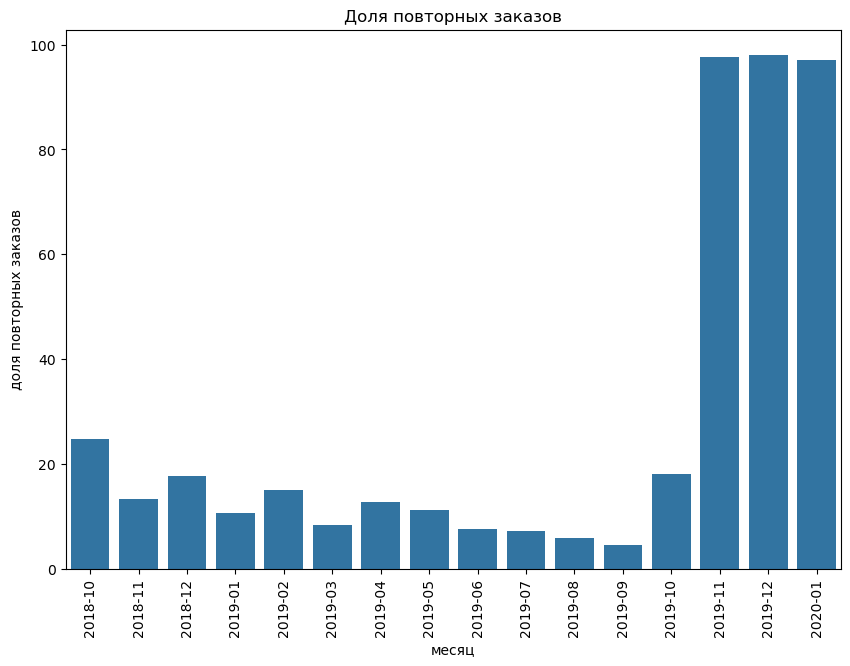

In [42]:
orders = (
    df.copy()
    .groupby('order_id', as_index=False)
    .agg({'customer_id':'max', 'date':'max', 'month':'max'})
)

# create table of first orders
first_orders = orders.sort_values('date').groupby('customer_id').head(1)

# create boolean column to identify repeated orders = not the first order for customer
orders['repeated_order'] = ~orders.order_id.isin(first_orders.order_id)

# group by month
orders = orders.groupby('month', as_index=False).agg({'order_id':'count', 'repeated_order':'sum'}).rename(columns={'order_id':'orders'})
orders['repeated_orders_share'] = round(100 * (orders.repeated_order / orders.orders), 2)
orders

# add column with average revenue per last 4 months 

ax, fig = plt.subplots(figsize=(10,7))
sns.barplot(data=orders, x='month', y='repeated_orders_share', color='#1f77b4')
plt.title('Доля повторных заказов')
plt.xticks(rotation='vertical')
plt.xlabel('месяц')
plt.ylabel('доля повторных заказов')
plt.show();


In [43]:
orders = (
    df.copy().
    groupby('order_id', as_index=False)
    .agg({'amount':'sum', 'customer_id':'max', 'date':'max'})
)
first_orders = orders.sort_values('date').groupby('customer_id').head(1)
orders['repeated_order'] = ~orders.order_id.isin(first_orders.order_id)

(
    orders
    .groupby('repeated_order', as_index=False)
    .agg({'amount':'mean'})
    .rename(columns={'amount':'average_bill'})
)


,repeated_order,average_bill
0,False,"1,218.93"
1,True,899.82


**Conclusion**.

1. During 2019, the share of repeat purchases did not exceed 20%. This may be a result of seasonal demand. Customers returned only a year after their first purchase to buy again. It is recommended that you maintain a relationship with customers throughout the year to achieve more regular purchases. Customers may simply not be familiar with the rest of the store's assortment
2. I recommend doing research on the customers that left to understand the reasons why they left and use to improve the store.
3. The percentage of repeat orders rose to almost 100% in November 2019 and remains at that level until January 2020, which indicates a lack of new customers. It's great that the store has a loyal audience, but in order to increase revenue, you need to attract new customers
4. The average check for repeat purchases is 25% lower than first purchases. Usually, there is an increase in the average check as customer loyalty to the store increases. But not in our case

#### average check dynamics

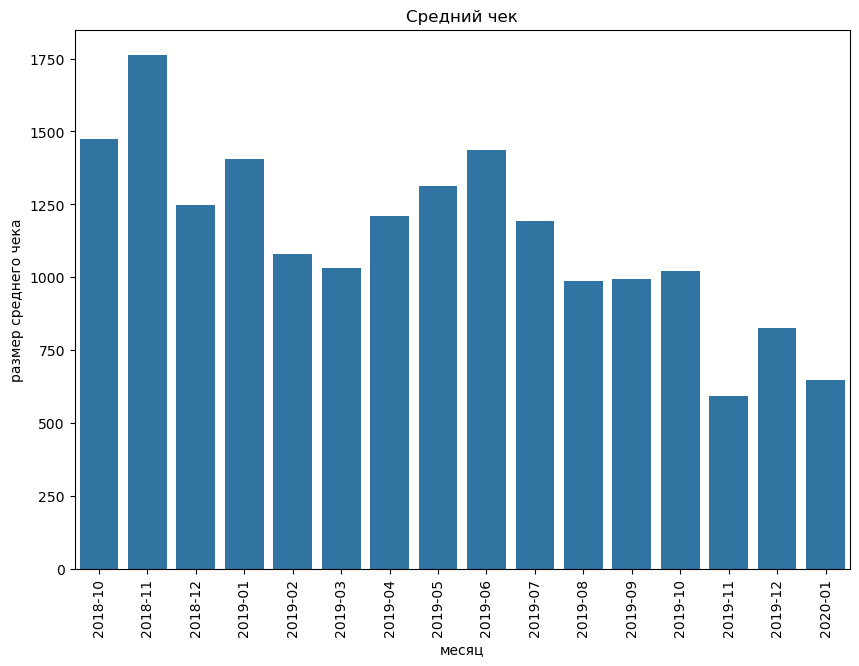

In [44]:
df_chart = (
    df.copy()
    .groupby('order_id', as_index=False)
    .agg({'date':'max', 'month':'max', 'amount':'sum'})
)

# group by months
df_chart = df_chart.groupby('month', as_index=False).agg({'amount':'mean'}).rename(columns={'amount':'average_bill'})

ax, fig = plt.subplots(figsize=(10,7))
sns.barplot(data=df_chart, x='month', y='average_bill', color='#1f77b4')
plt.title('Средний чек')
plt.xticks(rotation='vertical')
plt.xlabel('месяц')
plt.ylabel('размер среднего чека')
plt.show();


**Conclusion**.

1. the average bill varies a lot: in the range from 600 to 1,600 rubles
2. In November 2019 the average check fell to 600 rubles and is not growing for the last 3 months, although the number of orders is growing. The store sells a lot of inexpensive goods. The increase in the number of orders makes up for the decrease in the average check, but increases operating costs. It is worthwhile to see how net profit has changed over the last 6 months. 
3. Increasing the number of orders is an opportunity. I recommend introducing a recommendation system in the store, and thus increasing the average receipt through up-sales 

## Segmentation

### Customer Segmentation (RFM Analysis)

For segmentation purposes, a weighted RFM_score will be calculated for each existing customer based on the customer's interactions with the store:
- Recency - number of days since the customer's last purchase
- Frequency - number of purchases over the history
- Monetary - amount of total revenue from the client

To calculate RFM_score according to recommendations of Miglautsch (2000) we will use the formula 
```
Customer_RFM_score = 100 * (Recency_score * 5 + Frequency_score * 3 + Monetary_score * 1) / Max_RFM_score
```

Based on the value of the weighted RFM_score, the clients will be divided into segments.

In [45]:
segment = (
    df.copy()
    .groupby('customer_id', as_index=False)
    .agg({'amount':'sum', 'order_id':'nunique', 'date':'max'})
    .rename(columns={'amount':'total_revenue', 'order_id':'orders_count', 'date':'recent_order_date'})
)

# Recency score
recency = (
    df.copy()
    .groupby('customer_id', as_index=False)
    .agg({'date':'max'})
    .rename(columns={'date':'last_order_date'})
)
recency['days_from_last_order'] = (recency.last_order_date.max() - recency.last_order_date) / np.timedelta64(1, 'D')
recency['recency_score'] = recency.days_from_last_order.rank(ascending=False) / recency.days_from_last_order.rank(ascending=False).max()

# Frequency score
frequency = (
    df.copy()
    .groupby('customer_id', as_index=False)
    .agg({'order_id':'nunique'})
    .rename(columns={'order_id': 'orders_count'})
)
frequency['frequency_score'] = frequency.orders_count.rank(method='min') / frequency.orders_count.rank(method='min').max()

# Monetary score
monetary = (
    df.copy()
    .groupby('customer_id', as_index=False)
    .agg({'amount':'sum'})
    .rename(columns={'amount':'revenue'})
)
monetary['monetary_score'] = monetary.revenue.rank() / monetary.revenue.rank().max()

# merge RFM scores
metrics = ['recency_score', 'frequency_score', 'monetary_score']
for metric in metrics:
    if metric in segment.columns:
        segment.drop(metric, axis=1)

segment = segment.merge(recency[['customer_id', 'recency_score']], on='customer_id', how='left')
segment = segment.merge(frequency[['customer_id', 'frequency_score']], on='customer_id', how='left')
segment = segment.merge(monetary[['customer_id', 'monetary_score']], on='customer_id', how='left')

# calculate RFM score
segment['RFM_score'] = segment.recency_score * 3 + segment.frequency_score * 2 + segment.monetary_score * 1

# normalize and round RFM score
max_RFM_score = segment.RFM_score.max()
segment.RFM_score = round(100 * segment.RFM_score / max_RFM_score, 0)

Based on the calculated RFM coefficients 4 segments will be formed:
1. 'Champions' above the 3rd quartile
2. 'Potential' between 2nd and 3rd quartile 
3. 'Fluctuating' between 1st and 2nd quartile 
4. 'Lost' below 1 quartile 

In [46]:
bins = [
    0, 
    np.quantile(segment.RFM_score, 0.25), 
    np.quantile(segment.RFM_score, 0.5),
    np.quantile(segment.RFM_score, 0.75),
    segment.RFM_score.max()
    ]

labels = ['4. Потерянный', '3. Колеблющийся', '2. Потенциальный', '1. Чемпион']
segment['segment'] = pd.cut(segment.RFM_score, bins=bins, labels=labels)

In [47]:
# add segments to the main data frame 
if 'segment' in df.columns:
    df = df.drop('segment', axis=1)
    
df = df.merge(segment[['customer_id', 'segment']], how='left', on='customer_id')

#### number of clients per segment

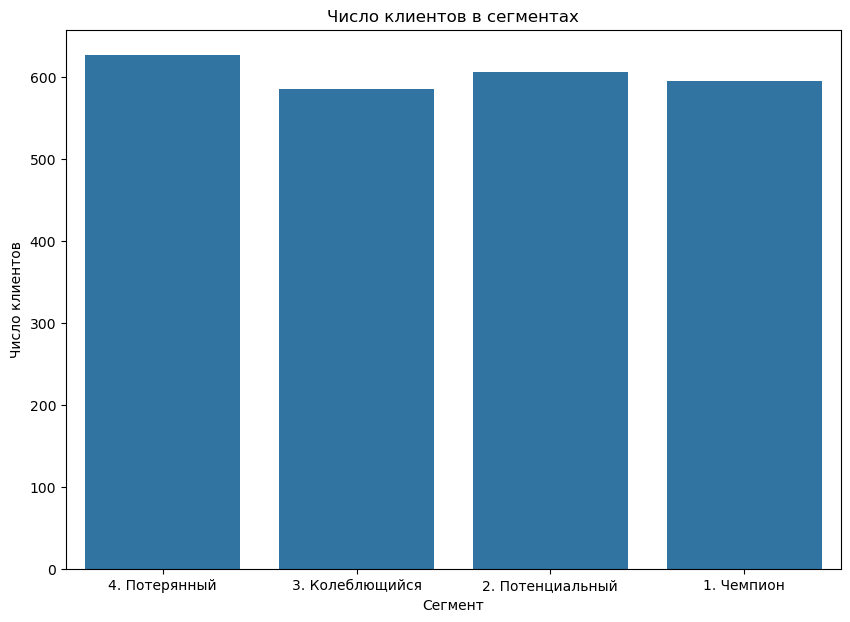

In [48]:
chart_df = (
    df.copy()
    .groupby('segment', as_index=False)
    .agg({'customer_id':'nunique'})
    .rename(columns={'customer_id':'customers_count'})
    .sort_values('customers_count')
)

fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data=chart_df, x='segment', y='customers_count', color='#1f77b4')

plt.title('Число клиентов в сегментах')
plt.xlabel('Сегмент')
plt.ylabel('Число клиентов')
plt.show();

Customers are evenly distributed across segments. Each segment has approximately 600 customers

#### average check by segment

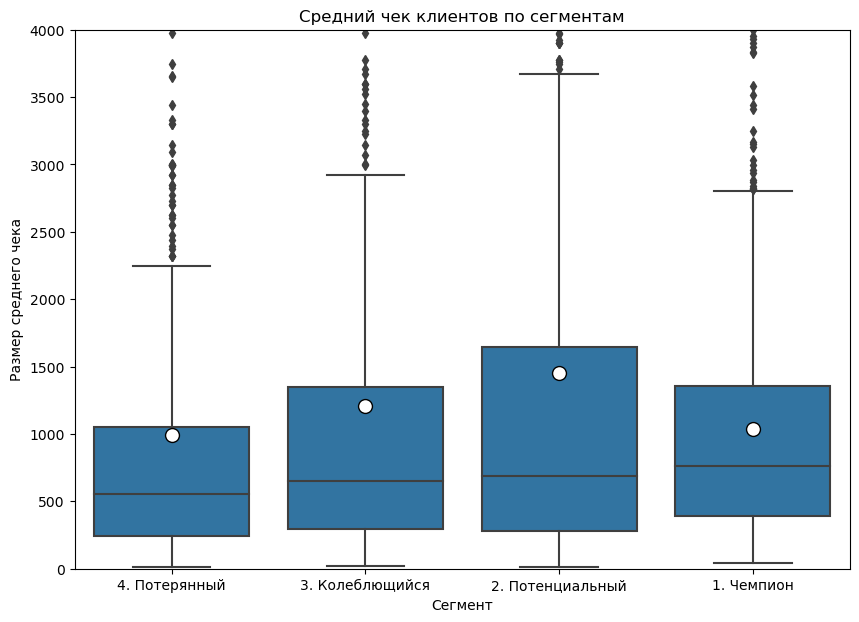

In [49]:
chart_df = (
    df.copy()
    .groupby('order_id', as_index=False)
    .agg({'segment':'max', 'customer_id':'max', 'amount':'sum'})
    .drop('order_id', axis=1)
    .groupby('customer_id', as_index=False)
    .agg({'segment':'max', 'amount':'mean'})
    .rename(columns={'amount':'average_bill'})
    [['segment', 'average_bill']]
    .sort_values('segment', ascending=False)
)

ax, fig = plt.subplots(figsize=(10,7))
sns.boxplot(data=chart_df, 
            x='segment', 
            y='average_bill', 
            showmeans=True, 
            meanprops={
                "marker":"o",
                "markerfacecolor":"white", 
                "markeredgecolor":"black", 
                "markersize":"10"
            },
            color='#1f77b4'
           )
plt.title('Средний чек клиентов по сегментам')
plt.xlabel('Сегмент')
plt.ylim(0, 4000)
plt.ylabel('Размер среднего чека')
plt.show();


1. The average check has a lot of outliers - there are customers who buy large amounts of money. So to focus on average values in the case of the average check is not quite right. One big purchase of one client can change the situation in the whole segment 
2. Clients in the Potential segment have the highest average check. The second place is shared by the Champion and Fluctuating segments
3. In terms of median check value, the customers of the Champion segment are much higher than the others. These customers are more stable. The Champion category has the fewest customers with unusually high median checks. At the same time, they seem to choose more expensive products.

#### number of orders segment

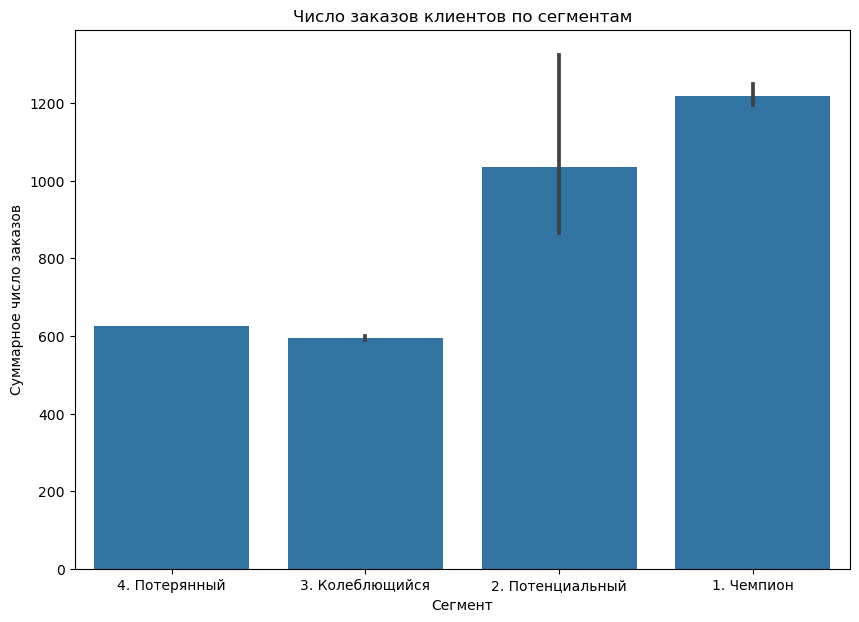

доля сегмента Чемпион по числу заказов составляет 35%


In [50]:
chart_df = (
    df.copy()
    .groupby('customer_id', as_index=False)
    .agg({'segment':'max', 'order_id':'nunique'})
    .drop('customer_id', axis=1)
    .rename(columns={'order_id':'orders_count'})
    .sort_values('segment', ascending=False)
)


ax, fig = plt.subplots(figsize=(10,7))
sns.barplot(
    data=chart_df,
    x='segment',
    y='orders_count',
    estimator=sum,
    color='#1f77b4'
)
plt.title('Число заказов клиентов по сегментам')
plt.xlabel('Сегмент')
plt.ylabel('Суммарное число заказов')
plt.show();
print(f'доля сегмента Чемпион по числу заказов составляет {100*chart_df[chart_df.segment == "1. Чемпион"].orders_count.sum() / chart_df.orders_count.sum():0.0f}%')

1. Clients of the Champion segment ordered the most. In total, they made more than 1,000 orders (34% of all orders).
2. Clients of the Potential segment made almost as many orders as clients of the Champion segment
3. the customers of the Fluctuating segment made the least number of orders

### Hypotheses and their testing

**Hypothesis 1**  
H0: customer segment X does not differ from other customers in terms of revenue per month  
H1: customer segment X differs from other customers by revenue per month

**Hypothesis 2**  
H0: customer segment X does not differ from other customers by number of purchases per month  
H1: customer segment X differs from other customers by number of purchases per month


**Test Parameters**  
Significance level alpha 0.05 for both tests. A Bonferroni correction will be applied to it due to multiple (eight) comparisons of the same samples.  
The Mann-Whitney test will be applied to the statistical test for both metrics because the metrics are not subject to a normal distribution

In [51]:
# подготовка данных

hyp_df = (
    df.copy()
    .groupby('customer_id', as_index=False)
    .agg({'segment':'max', 'date':'min', 'order_id':'nunique', 'amount':'sum'})
    .rename(columns={'date':'first_order_date', 'order_id':'orders_count', 'amount':'revenue'})
)
hyp_df['lifetime_months'] = (df.date.max() - hyp_df.first_order_date) / np.timedelta64(1, 'M')
hyp_df['monthly_revenue'] = hyp_df.revenue / hyp_df.lifetime_months
hyp_df['monthly_orders'] = hyp_df.orders_count / hyp_df.lifetime_months

#### Hypothesis 1
H0: customer segment X does not differ from other customers in terms of revenue per month

H1: customer segment X differs from other customers in terms of revenue per month

In [52]:
alpha = 0.05
# поправка Бонферрони. 12 сравнений в рамках одного множества
P = 0.05 / 6

comparisons_count = 0
segments_A = []
segments_B = []

for segment_A in hyp_df.segment.unique():
    for segment_B in hyp_df.segment.unique():
        if segment_A == segment_B:
            continue
        
        if segment_B in segments_A and segment_A in segments_B:
            continue
        segments_A.append(segment_A)
        segments_B.append(segment_B)
        
        A = hyp_df[hyp_df.segment == segment_A].monthly_revenue
        B = hyp_df[hyp_df.segment == segment_B].monthly_revenue
        comparisons_count += 1
        print(f'\nРезультат теста №{comparisons_count}')
        print(f'сегмент {segment_A} против сегмента {segment_B}')
        print(f'p-value = {stats.mannwhitneyu(A, B).pvalue}')
        if stats.mannwhitneyu(A, B).pvalue > P:
            print('Нулевая гипотеза не может быть отклонена. Выборки могут быть идентичны')
        else:
            print('Нулевая гипотеза отклонена. Выборки отличаются')


Результат теста №1
сегмент 2. Потенциальный против сегмента 4. Потерянный
p-value = 7.520647599511751e-64
Нулевая гипотеза отклонена. Выборки отличаются

Результат теста №2
сегмент 2. Потенциальный против сегмента 3. Колеблющийся
p-value = 2.5088110091420113e-21
Нулевая гипотеза отклонена. Выборки отличаются

Результат теста №3
сегмент 2. Потенциальный против сегмента 1. Чемпион
p-value = 0.22217453273137366
Нулевая гипотеза не может быть отклонена. Выборки могут быть идентичны

Результат теста №4
сегмент 4. Потерянный против сегмента 3. Колеблющийся
p-value = 3.320799638899522e-27
Нулевая гипотеза отклонена. Выборки отличаются

Результат теста №5
сегмент 4. Потерянный против сегмента 1. Чемпион
p-value = 4.9337880019686525e-95
Нулевая гипотеза отклонена. Выборки отличаются

Результат теста №6
сегмент 3. Колеблющийся против сегмента 1. Чемпион
p-value = 5.439355852092654e-37
Нулевая гипотеза отклонена. Выборки отличаются


#### Hypothesis 2
H0: customer segment X does not differ from other customers in terms of number of purchases per month

H1: customer segment X differs from other customers by the number of purchases per month

In [53]:
alpha = 0.05
# поправка Бонферрони. 12 сравнений в рамках одного множества
P = 0.05 / 6

comparisons_count = 0
segments_A = []
segments_B = []

for segment_A in hyp_df.segment.unique():
    for segment_B in hyp_df.segment.unique():
        if segment_A == segment_B:
            continue
        
        if segment_B in segments_A and segment_A in segments_B:
            continue
        segments_A.append(segment_A)
        segments_B.append(segment_B)
        
        A = hyp_df[hyp_df.segment == segment_A].monthly_orders
        B = hyp_df[hyp_df.segment == segment_B].monthly_orders
        comparisons_count += 1
        print(f'\nРезультат теста №{comparisons_count}')
        print(f'сегмент {segment_A} против сегмента {segment_B}')
        print(f'p-value = {stats.mannwhitneyu(A, B).pvalue}')
        if stats.mannwhitneyu(A, B).pvalue > P:
            print('Нулевая гипотеза не может быть отклонена. Выборки могут быть идентичны')
        else:
            print('Нулевая гипотеза отклонена. Выборки отличаются')


Результат теста №1
сегмент 2. Потенциальный против сегмента 4. Потерянный
p-value = 1.0938783226229113e-202
Нулевая гипотеза отклонена. Выборки отличаются

Результат теста №2
сегмент 2. Потенциальный против сегмента 3. Колеблющийся
p-value = 2.8339012032691565e-101
Нулевая гипотеза отклонена. Выборки отличаются

Результат теста №3
сегмент 2. Потенциальный против сегмента 1. Чемпион
p-value = 1.5421739800933971e-06
Нулевая гипотеза отклонена. Выборки отличаются

Результат теста №4
сегмент 4. Потерянный против сегмента 3. Колеблющийся
p-value = 5.2422347818309484e-154
Нулевая гипотеза отклонена. Выборки отличаются

Результат теста №5
сегмент 4. Потерянный против сегмента 1. Чемпион
p-value = 7.246329856339689e-201
Нулевая гипотеза отклонена. Выборки отличаются

Результат теста №6
сегмент 3. Колеблющийся против сегмента 1. Чемпион
p-value = 2.099591882915815e-122
Нулевая гипотеза отклонена. Выборки отличаются


**Conclusion**

All of the proposed null hypotheses are rejected. The customer segmentation is correct. 

All segments differ in order frequency and average monthly spending

### preferences of the segments

#### seasonal preferences

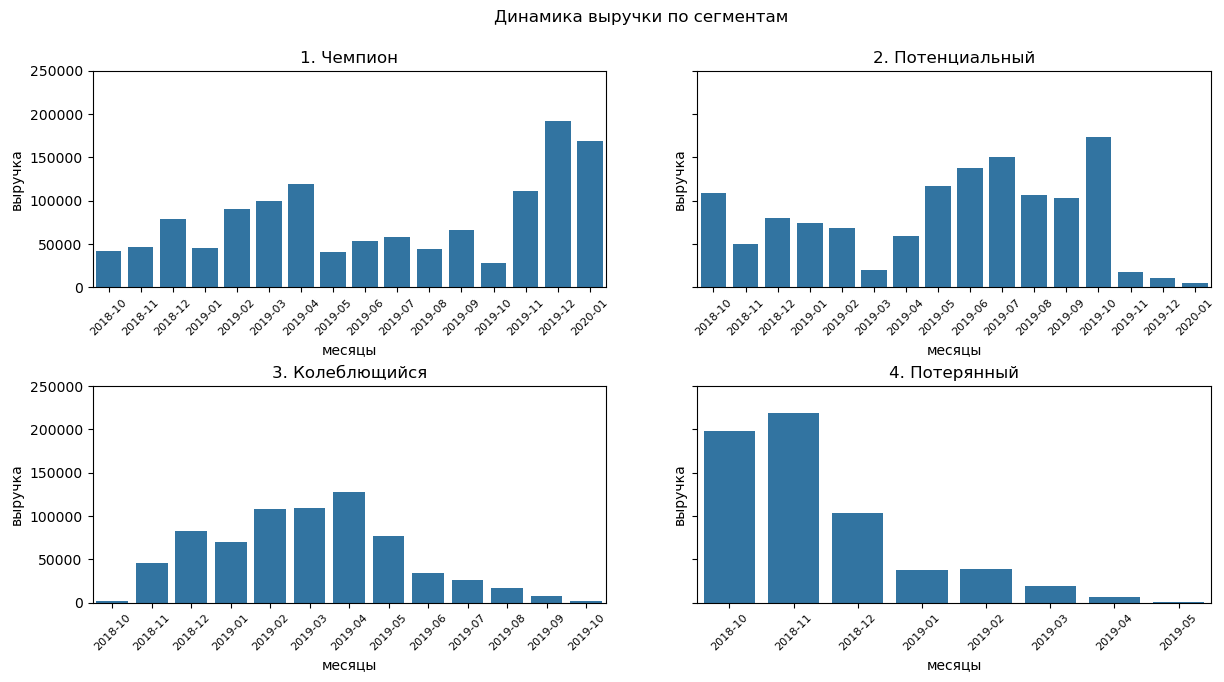

In [54]:
fig, axs = plt.subplots(ncols=2, nrows=2, sharey=True, figsize=(13,7))
fig.tight_layout(pad=5)

i = 0
for segment_name in df.sort_values('segment', ascending=False).segment.unique():
    
    # iteration thru axes
    ax = axs.item(i)
    i += 1

    # slice the data to separate the segment
    segment_chart = (
        df[df.segment == segment_name].copy()
        .groupby(['category', 'date'], as_index=False)
        .agg({'amount':'sum'})
    )

    # add column with date of monday for each month
    segment_chart['month_monday'] = segment_chart.date.dt.to_period('M')

    segment_chart = segment_chart.groupby('month_monday', as_index=False).agg({'amount':'sum'})

    sns.barplot(data=segment_chart, x='month_monday', y='amount', ax=ax, color='#1f77b4')
    ax.set_title(segment_name)
    
    # rotate x ticks labels
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
        tick.set_fontsize(8)

    # format y ticks labels as decimal
    ax.ticklabel_format(style='plain', axis='y')
    ax.set_ylim(0,250000)
    ax.set_xlabel('месяцы')
    ax.set_ylabel('выручка')

fig.suptitle('Динамика выручки по сегментам')
plt.show();


**Conclusion**

1. **Champion**  
The segment's customers have been shopping the entire time the store has been open. Customers in this segment brought in the most revenue in the last three months. 

2. **Potential**  
Shopped as steadily as the Champions for the entire time the store was open and even brought in more revenue than the Champions, but decreased their activity in the last three months. Buying most in October, less in March and May.

3. **Fluctuating**  
The segment bought well from December 2018 through July 2019. Beginning in March 2019, revenue for this segment began to decline. Customers in this segment have not been buying anything since November 2019

4. **Lost**  
The segment was buying well at the beginning of the store (October 2018 to February 2019). Especially in November 2018. No purchases since May 2019

#### product preferences

5202

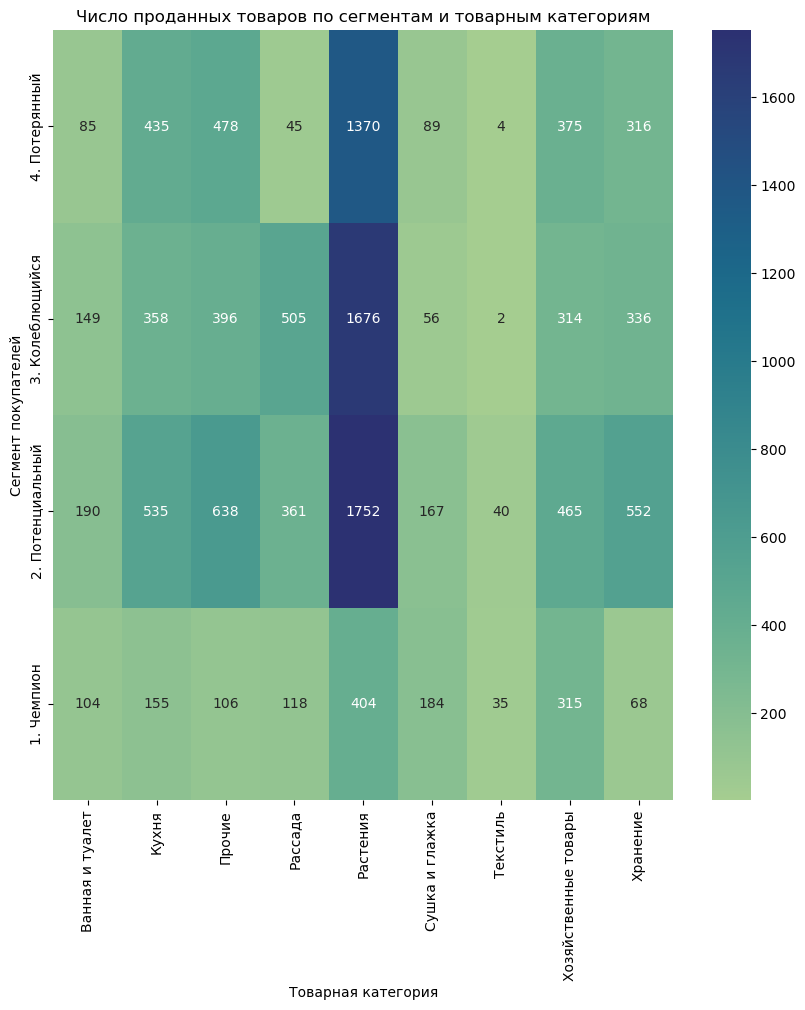

In [55]:
ax, fig = plt.subplots(figsize=(10,10))
segment_chart = df.pivot_table(index='segment', columns='category', values='quantity', aggfunc='sum')
display(df[df.category == "Растения"].quantity.sum())
sns.heatmap(segment_chart, annot=True, cmap='crest', fmt='g')
plt.ylabel('Сегмент покупателей')
plt.xlabel('Товарная категория')
plt.title('Число проданных товаров по сегментам и товарным категориям')
plt.show();

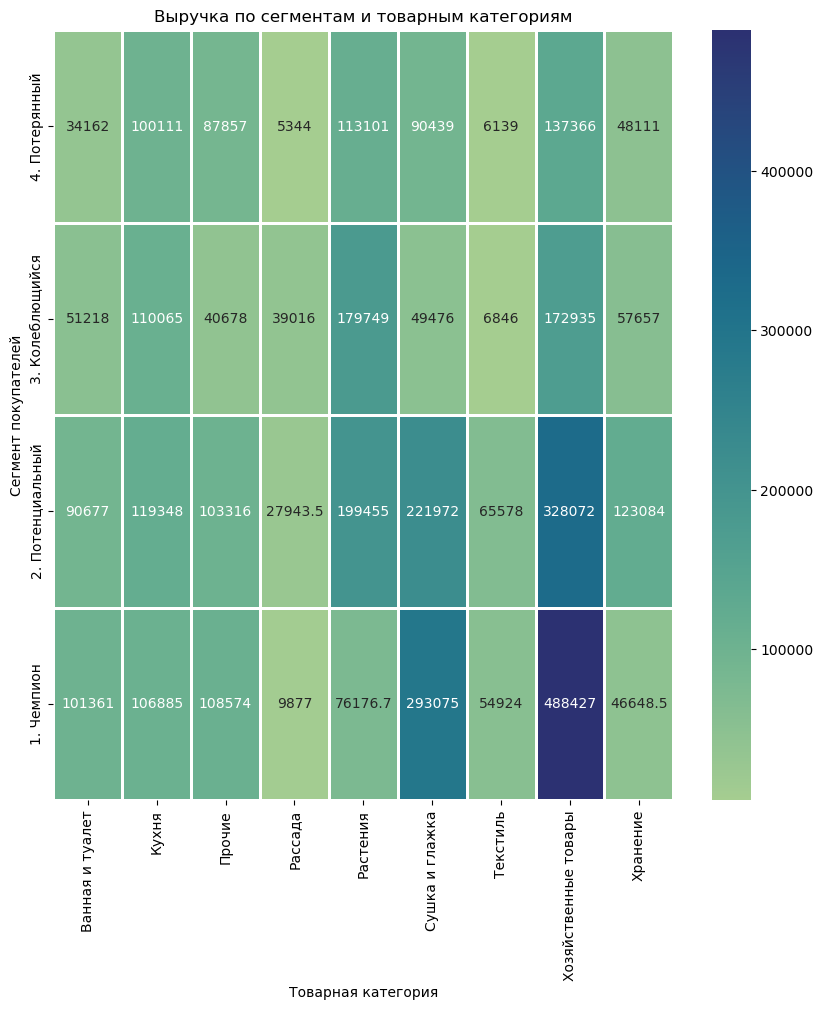

In [56]:
ax, fig = plt.subplots(figsize=(10,10))
segment_chart = df.pivot_table(index='segment', columns='category', values='amount', aggfunc='sum')

sns.heatmap(segment_chart, annot=True, cmap='crest', fmt='g', linewidths=1)
plt.ylabel('Сегмент покупателей')
plt.xlabel('Товарная категория')
plt.title('Выручка по сегментам и товарным категориям')
plt.show();

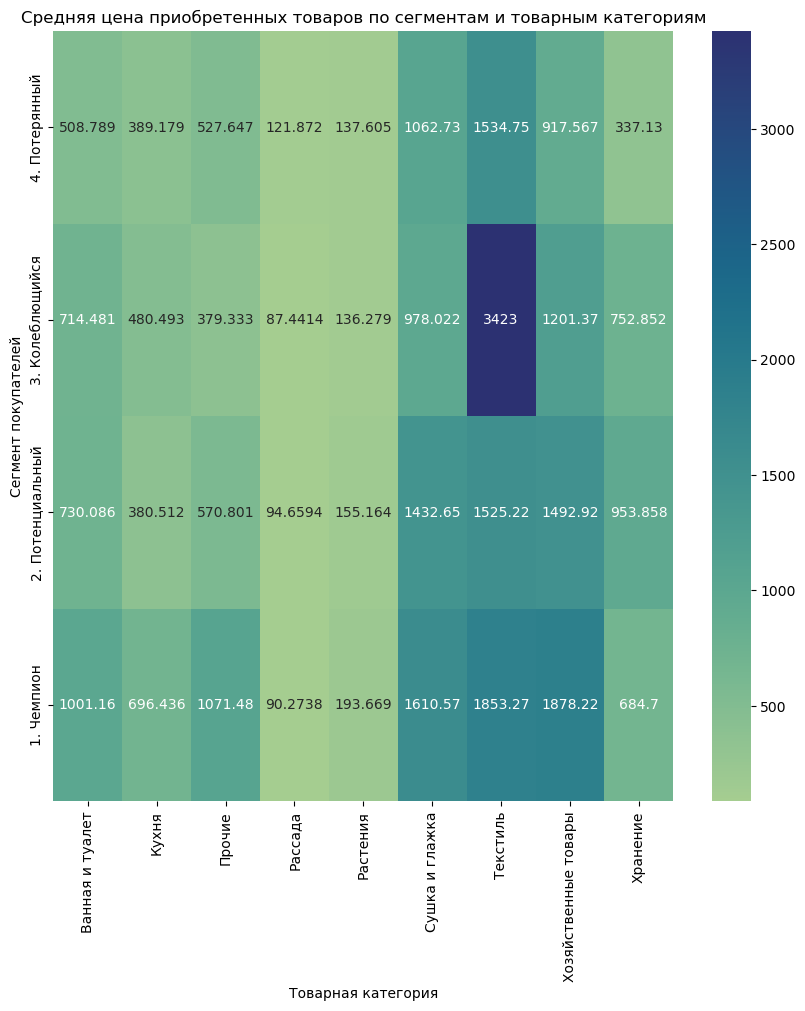

In [57]:
ax, fig = plt.subplots(figsize=(10,10))
segment_chart = df.pivot_table(index='segment', columns='category', values='price', aggfunc='mean')
sns.heatmap(segment_chart, annot=True, cmap='crest', fmt='g')
plt.ylabel('Сегмент покупателей')
plt.xlabel('Товарная категория')
plt.title('Средняя цена приобретенных товаров по сегментам и товарным категориям')
plt.show();

**Conclusion**.

1. **Champion**.  
Made equal purchases in all categories. Despite the fact that customers of the Champion segment don't buy much in pieces, they choose more expensive products than customers of other segments. Customers in this segment brought in more revenue than customers in other segments in the categories: drying and ironing and housewares. At the same time, they buy little in the "Plants" and "Housewares and Kitchenware" categories. In almost all categories (except Storage), Champion segment customers choose more expensive products than the other segments. These customers should definitely be retained and not try hard to expand their orders. They are already loyal to the store and may perceive excessive sales negatively. For them, you should think about expanding the store's assortment and introducing new product categories.

2. **Potential**.  
The segment eagerly buys merchandise in the "Storage", "Dishes and Kitchenware", "Drying and Ironing" and "Household Goods" categories. The segment buys admirably in all product categories. This segment buys a lot of plants. It's worth telling this segment about the more expensive items. It is worth doing a promo for them on Plants in the spring, at this point in time.

3. **Fluctuating**.  
The product preferences of the segment are very similar to those of the Potential segment. But the segment's customers are not as active in some categories ("Drying and Ironing," "Other," "Sprouts," "Textiles"). These categories can be used to upgrade customers to Potential. 
The Fluctuating segment chooses inexpensive items. This segment has very good potential. It is likely to respond well to promotions and discounts.

4. **Lost**.  
The segment prefers goods in the categories "Dishes and Kitchenware", "Plants", "Household Goods" and "Other". The other categories are not a priority. Perhaps the segment is not aware of their existence in the store. For example, the segment didn't buy "Textiles" at all. 

## K-mean segmentation (clustering)

### data preparation

In [58]:
customers_df = (
    df
    .groupby('customer_id', as_index=False)
    .agg({
            'date':['min', 'max'],  # date of first and last order
            'order_id':'nunique',   # number of orders
            'amount':'sum',         # total orders' amount
            'price':'mean',         # average price of product
            'quantity':'sum'        # quantity of products
        })
)
customers_df.columns = ['_'.join(col) for col in customers_df.columns]
customers_df = customers_df.rename(columns={
        'customer_id_':'customer_id',
        'date_min':'first_order_date',
        'date_max':'last_order_date',
        'order_id_nunique':'orders_count',
        'amount_sum':'revenue',
        'price_mean':'average_price',
        'quantity_sum':'total_quantity'
})
customers_df['days_from_last_order'] = (df.date.max() - customers_df.last_order_date) / np.timedelta64(1, 'D')

### define number of segments

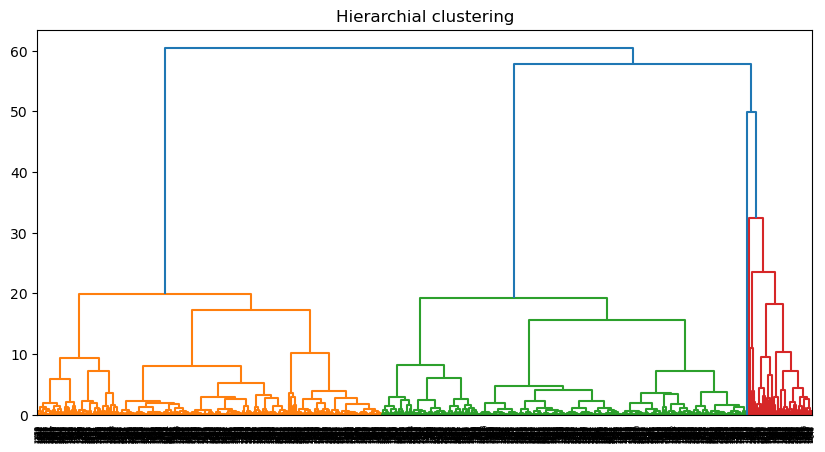

In [59]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 

# delete useless features and customer_id
x = customers_df.drop(['first_order_date', 'last_order_date', 'orders_count', 'total_quantity', 'customer_id'], axis=1)
sc = StandardScaler()
x_sc = sc.fit_transform(x)
linked = linkage(x_sc, method='ward')
plt.figure(figsize=(10, 5))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering')
plt.show()

All customers will be divided into 3 segments.  
Some segments will be too short. So they will be dropped as not significant. 

### set segments

In [66]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

x = customers_df.drop(['first_order_date', 'last_order_date', 'orders_count', 'total_quantity', 'customer_id'], axis=1)
sc = StandardScaler()
x_sc = sc.fit_transform(x)
km = KMeans(n_clusters=3, n_init=10)
labels = km.fit_predict(x_sc)
segmented_customers = customers_df.copy()
segmented_customers['segment'] = labels + 1 # +1 used to avoid segment 0 that could be not clear for business

# check quality of segmentation
print(f'Silhouette score showing above-average quality of clustering is {silhouette_score(x_sc, labels):0.2%}')


Silhouette score showing quality of clustering is 48.77%
K-mean model inertia is 3664.451696056625


In [61]:
display(
    segmented_customers
    .groupby('segment', as_index=False)
    .mean(numeric_only=True)
    .merge(segmented_customers.groupby('segment', as_index=False).customer_id.nunique(), on='segment', how='left')
)

,segment,orders_count,revenue,average_price,total_quantity,days_from_last_order,customer_id
0,1,1.62,"1,160.97",596.28,2.94,87.05,1154
1,2,2.48,"8,260.01","3,597.32",9.67,206.92,162
2,3,1.10,"1,111.11",412.03,7.50,352.24,1096


### properties of the segments

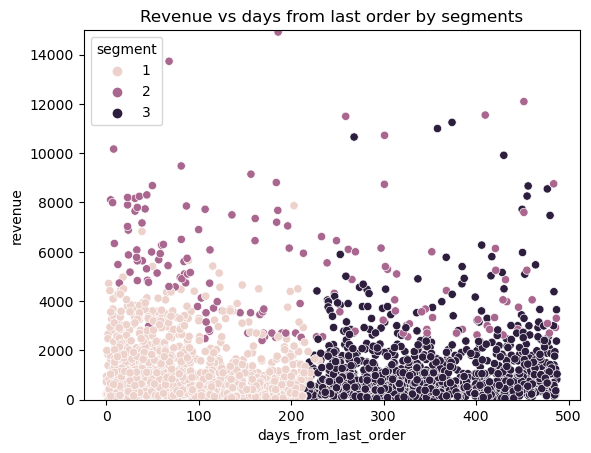

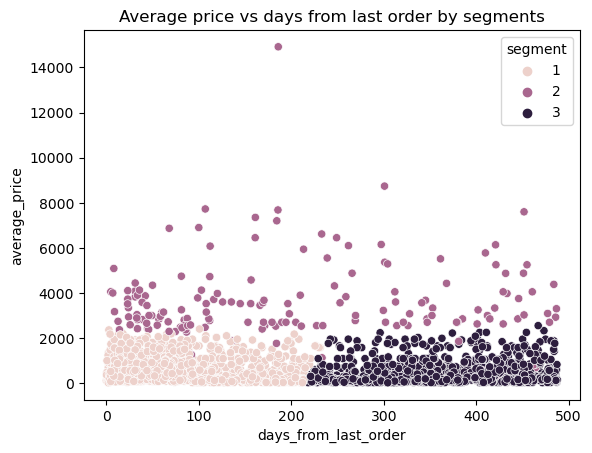

In [62]:
chart_df = segmented_customers.copy()
sns.scatterplot(data=chart_df, x='days_from_last_order', y='revenue', hue='segment')
plt.title('Revenue vs days from last order by segments')
plt.ylim(0,15000)
plt.show();

sns.scatterplot(data=chart_df, x='days_from_last_order', y='average_price', hue='segment')
plt.title('Average price vs days from last order by segments')
plt.show();

All customers automatically divided into 3 segments:  
1. prefer more expensive products and because of this brought to the shop most of the revenue
2. last time purchased > 200 days ago
3. last time purchased during the last 200 days

### Hypotheses' testing

**Hypothesis 1**  
H0: customer segment X does not differ from customer segment Y in terms of revenue per month  
H1: customer segment X differs from customer segment Y in terms of revenue per month

**Hypothesis 2**  
H0: customer segment X does not differ from customer segment Y in terms of purchases per month  
H1: customer segment X differs from customer segment Y in terms of purchases per month


**Test Parameters**  
Significance level alpha =0.05 for both of the tests. A Bonferroni correction will be applied to it due to multiple (three) comparisons of the same samples.  
The Mann-Whitney test will be used to statistically test both metrics because the metrics are not subject to a normal distribution

#### Data's preparation (metrics' calculation)

In [63]:
# revenue per month per customer
first_order_date = df.groupby('customer_id', as_index=False).date.min()
if not 'first_order_date' in segmented_customers.columns:
    segmented_customers = segmented_customers.merge(first_order_date, on='customer_id', how='left').rename(columns={'date':'first_order_date'})
max_date = df.date.max()
segmented_customers['lifetime_months'] = (max_date  - segmented_customers.first_order_date) / np.timedelta64(1, 'M')
segmented_customers['monthly_revenue'] = segmented_customers.revenue / segmented_customers.lifetime_months

# number of purchases per month per customer
segmented_customers['monthly_orders'] = segmented_customers.orders_count / segmented_customers.lifetime_months

#### Hypothesis 1

In [64]:
alpha = 0.05
# Bonferroni correction
P = 0.05 / 3

comparisons_count = 0
segments_A = []
segments_B = []

for segment_A in segmented_customers.segment.unique():
    for segment_B in segmented_customers.segment.unique():
        if segment_A == segment_B:
            continue
        
        if segment_B in segments_A and segment_A in segments_B:
            continue
        segments_A.append(segment_A)
        segments_B.append(segment_B)
        
        A = segmented_customers[segmented_customers.segment == segment_A].monthly_revenue
        B = segmented_customers[segmented_customers.segment == segment_B].monthly_revenue
        comparisons_count += 1
        print(f'\nРезультат теста №{comparisons_count}')
        print(f'сегмент {segment_A} против сегмента {segment_B}')
        print(f'p-value = {stats.mannwhitneyu(A, B).pvalue}')
        if stats.mannwhitneyu(A, B).pvalue > P:
            print('Нулевая гипотеза не может быть отклонена. Выборки могут быть идентичны')
        else:
            print('Нулевая гипотеза отклонена. Выборки отличаются')


Результат теста №1
сегмент 1 против сегмента 3
p-value = 1.197950304390916e-35
Нулевая гипотеза отклонена. Выборки отличаются

Результат теста №2
сегмент 1 против сегмента 2
p-value = 4.208571747942143e-70
Нулевая гипотеза отклонена. Выборки отличаются

Результат теста №3
сегмент 3 против сегмента 2
p-value = 1.939621308549561e-85
Нулевая гипотеза отклонена. Выборки отличаются


#### Hypothesis 2

In [65]:
alpha = 0.05
# Bonferroni correction
P = 0.05 / 6

comparisons_count = 0
segments_A = []
segments_B = []

for segment_A in segmented_customers.segment.unique():
    for segment_B in segmented_customers.segment.unique():
        if segment_A == segment_B:
            continue
        
        if segment_B in segments_A and segment_A in segments_B:
            continue
        segments_A.append(segment_A)
        segments_B.append(segment_B)
        
        A = segmented_customers[segmented_customers.segment == segment_A].monthly_orders
        B = segmented_customers[segmented_customers.segment == segment_B].monthly_orders
        comparisons_count += 1
        print(f'\nРезультат теста №{comparisons_count}')
        print(f'сегмент {segment_A} против сегмента {segment_B}')
        print(f'p-value = {stats.mannwhitneyu(A, B).pvalue}')
        if stats.mannwhitneyu(A, B).pvalue > P:
            print('Нулевая гипотеза не может быть отклонена. Выборки могут быть идентичны')
        else:
            print('Нулевая гипотеза отклонена. Выборки отличаются')


Результат теста №1
сегмент 1 против сегмента 3
p-value = 0.0
Нулевая гипотеза отклонена. Выборки отличаются

Результат теста №2
сегмент 1 против сегмента 2
p-value = 1.5688139959311959e-15
Нулевая гипотеза отклонена. Выборки отличаются

Результат теста №3
сегмент 3 против сегмента 2
p-value = 9.502443688647665e-29
Нулевая гипотеза отклонена. Выборки отличаются


#### Conclusion
All segments are differs from each others. Therefore the segments were prepared correctly and contains customers with unique properties. 

## Overall conclusion

#### General recommendations
1. The sales of the store are decreasing during the analyzed period in terms of revenue. The main reason for this is that the store is losing customers and not finding new ones. Recommendations for interacting with existing customers and preventing churn are given below. In this block we will focus on new customers.
2. In the last 6 months there has been a gradual increase in the number of orders. It is noticeable that efforts have been made in this direction. However, it is worth remembering that the number of orders is not the only goal. It is worth setting goals for the content of the orders, that is, for the revenue. 
3. During 2019, the percentage of repeat purchases did not exceed 20%. In the last 3 months, the repeat order rate has increased to almost 100%. It's great to be able to return and retain customers. But at the same time it shows that the number of new customers is close to zero. This means that marketing activity has stopped or become ineffective. Sooner or later the absence of new customers will lead to more problems. Since the customer outflow occurs anyway in any store, and we can only influence its intensity, the number of orders will decrease. Investment is required in attracting new customers. In addition, the average check for repeat purchases is 23% lower than for first purchases. That is, the store manages to return not the most valuable customers. 
4. Often the fluctuations in revenue by category were in sync, suggesting that the fluctuations are due to common causes. This may be the effect of marketing activities. It is recommended that marketing activities be analyzed to evaluate their effectiveness and repeated if necessary.
5. From January to May, the average check is not increasing, but the number of orders is increasing. The store sells a lot of inexpensive goods. The increase in the number of orders makes up for the decrease in the average check. But at the same time, the increase in the number of orders is an opportunity. I recommend implementing a recommendation system in the store and thereby increasing the average receipt through up-sales
6. Since sales of goods in the "Dishes and Kitchenware" and "Textiles" categories have dropped significantly, it is worth checking further to see if there have been any changes in the assortment or pricing that might explain this. The cause of the decline in these segments is worth finding and eliminating. 

#### Recommendations to increase sales by segment
1. Retaining and returning customers who have already purchased from the store will stabilize revenue and make the business more predictable
2. All customers have been segmented into 4 segments. Each of them should be interacted with separately by applying different activities. The goal of the minimum is to move the customer one segment higher. 
3. Segmentation should be repeated in the future for new customers
4. The following suggestions for customer development in each segment are made:
    1. **Champions** - the most valuable and the most loyal clients of the store 
        - creation of referral program "Bring your friend - get money on account".
        - exclusive access to testing of new products and product categories, focus groups
        - birthday gifts (not congratulations, but gifts, even if they are not very big)
        - upsale through recommendations in the "Plants" and "Cookware" categories
    2. **Potential** - clients with the potential to grow into Champions  
        - creation of the loyalty program with accumulation of money in the internal account for the purchases (will increase the regularity of purchases)
        - promotional email newsletter in the categories of "Storage," "Dishes & Kitchenware," "Drying & Ironing," and "Household Goods"
        - upsale through recommendations of more expensive goods, emphasis on quality of goods
    3. **Fluctuating** - clients who bought well but not periodically  
        - onboarding/newsletter about the store: "how did we open? "what do we work for?" "what do we sell?", "new assortment in the categories "Storage", "Dishes and Kitchenware" and "Household Goods". This will allow you to remind customers of your existence 
        - unobtrusively add to the info newsletter promo block on the above categories, choose to promo inexpensive items and apply to them promotional prices. In this segment should work discounts
    4. **Lost** - customers who have bought well in the past, but last bought a very long time ago. You should try to get them back. It is harder to return than to keep them, but it is worth trying  
        - a promotion for the return - a deposit of 500 rubles in an internal account burned out after 2 weeks
        - for this segment it is recommended to conduct a survey "Why did you leave us?" to understand the reasons, correct them and slow down the departure of other clients
        - you can combine the promotion with a survey. Give a deposit only to those who passed the survey. Or give a higher deposit to those who passed the survey.